# ECG Inspection
This notebook processes the ECG data from the new scan and displays the ECG traces with detected R-peaks.
Visually verify that the R-peak detection is accurate.
In the future, additional functionality for advanced ECG analysis can be integrated.

### Loading packages and data

In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import utils.data_ingestion as di
import utils.ecg as ecg

def load_config(config_file="config.yaml"):
    with open(config_file, "r") as f:
        config = yaml.safe_load(f)
    return config

config = load_config()

# Set the file paths (or load from a temporary config file if you wish)
twix_file = config["data"]["twix_file"]
dicom_folder = config["data"]["dicom_folder"]

# Read TWIX file and extract k-space data
scans = di.read_twix_file(twix_file, include_scans=[-1], parse_pmu=False)

Software version: VD/VE (!?)

Scan  1


100%|██████████| 670M/670M [00:00<00:00, 1.04GB/s] 

Read 1 scans from meas_MID00086_FID26450_DMI_PMU_250216_100rep.dat


### Extracting and analyzing ECG

Extracted ICE parameter data shape: (11200,)
Extracted image data shape: (11200, 30, 256)
Average heart rate: 65.27 BPM


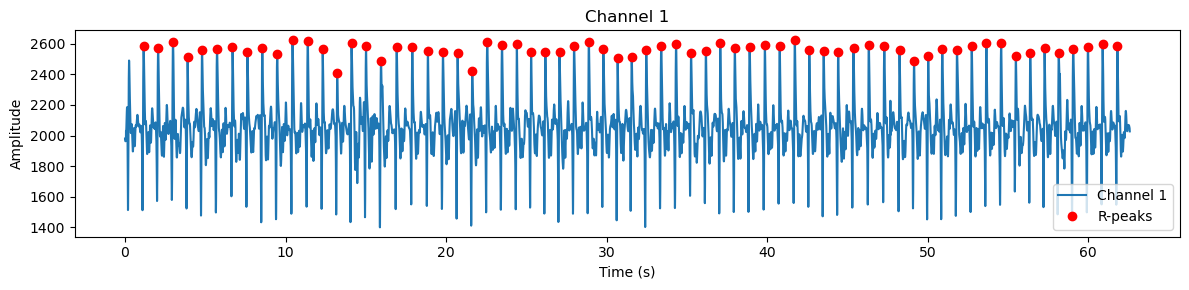

In [2]:
ecg_columns = np.s_[20]
ecg_data = di.extract_iceparam_data(scans, segment_index=0, columns=ecg_columns)
if ecg_data.ndim == 1:
    ecg_data = ecg_data.reshape(-1, 1)

framerate, frametime = di.get_dicom_framerate(dicom_folder)

kspace = di.extract_image_data(scans)
n_phase_encodes_per_frame = kspace.shape[0] // config["data"]["n_frames"]

# For ECG processing, you need the sampling frequency.
fs = framerate * n_phase_encodes_per_frame

# Detect R-peaks
r_peaks_list = ecg.detect_r_peaks(ecg_data, fs)
# Compute average heart rate (for information)
hr = ecg.compute_average_heart_rate(r_peaks_list, fs)
print(f"Average heart rate: {hr:.2f} BPM")

# Plot ECG signals with R-peaks
ecg.plot_ecg_signals(ecg_data, fs, r_peaks_list, mode="separate")